# Monthly Beer Production

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import darts
from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    Theta
)
from darts.metrics import mape, mase, mae, mse, ope, r2_score, rmse, rmsle
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.dataprocessing.transformers.boxcox import BoxCox

from timeseries_utils import (
    timeseries_csv_to_df,
    split_train_test,
    plot_results,
    eval_darts_model,
)

Importing plotly failed. Interactive plots will not work.


We will again be using DARTS as the main library in this analysis as we did with the Minimum Temperature example, so we need to load first the data as a DataFrame and then transform it into a TimeSeries object.

In [13]:
beer_timeseries = TimeSeries.from_csv(
    "../data/monthly-beer-production-in-austr.csv",
    time_col="Month",
    freq="MS"
)

And we split it into train and test sets:

In [22]:
train_split = pd.Timestamp(year=1990, month=1, day=1)
beer_train, beer_test = beer_timeseries.split_before(train_split)

## Dataset Description 

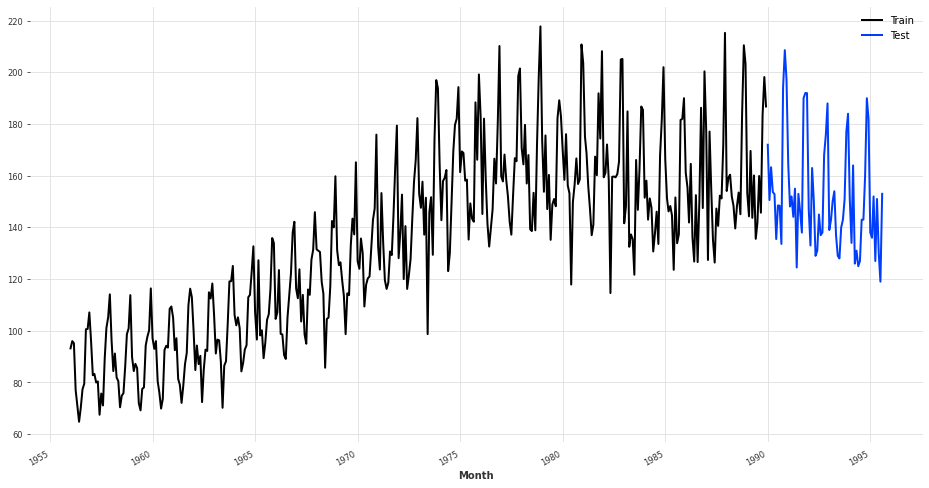

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))
beer_train.plot(label="Train")
beer_test.plot(label="Test")
plt.show()

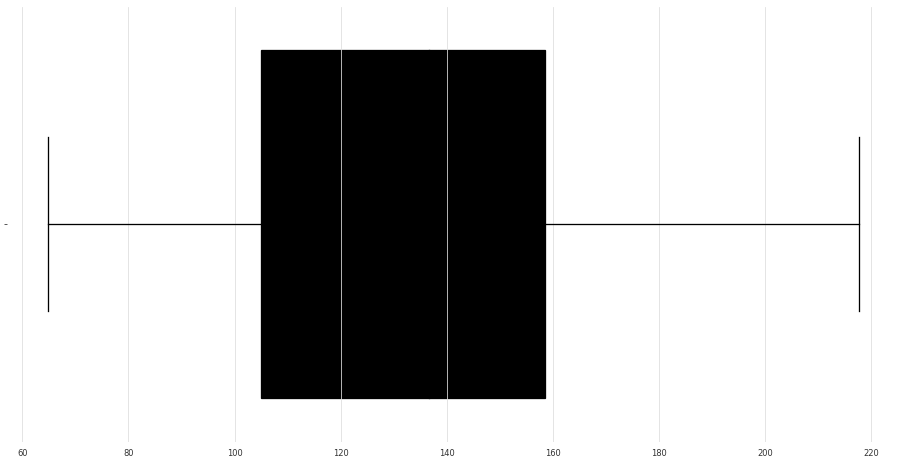

In [31]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(beer_train.all_values(), ax=ax)
plt.show()

In [37]:
for i in range(2, 13):
    is_seasonal, m = check_seasonality(beer_train, i)
    if is_seasonal:
        print(f"The dataset has a seasonality of degree {m}")

The dataset has a seasonality of degree 12


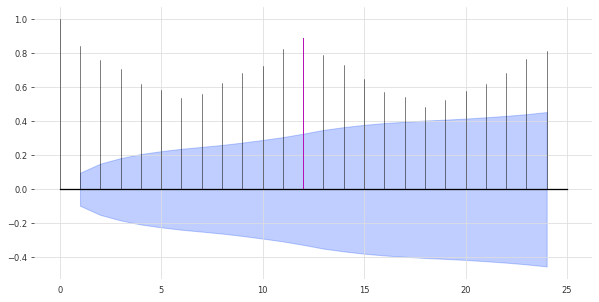

In [39]:
plot_acf(beer_train, m=12)

## Forecasting

In [51]:
models = [
    NaiveSeasonal(K=12),
    NaiveDrift(),
    Prophet(yearly_seasonality=True,
            daily_seasonality=False,
            weekly_seasonality=False),
    ExponentialSmoothing(),
    ARIMA(),
    AutoARIMA(),
    Theta()
]

In [52]:
for model in models:
    eval_darts_model(model, beer_train, beer_test, mape)


The error of the model is: 7.694159471045628
The error of the model is: 31.161155850867445
The error of the model is: 6.191984874797063
The error of the model is: 16.378673586873298
The error of the model is: 9.321254743038137


[2021-11-14 20:25:48,979] INFO | darts.models.forecasting.theta | Theta model inferred seasonality of training series: 12
[2021-11-14 20:25:48,979] INFO | darts.models.forecasting.theta | Theta model inferred seasonality of training series: 12
INFO:darts.models.forecasting.theta:Theta model inferred seasonality of training series: 12


The error of the model is: 18.383595375580423
The error of the model is: 10.743022691617274


As before, Prophet is still our best candidate, followed by the NaiveSeasonal due to an stagnation in the timeseries near the end of the training period, which benefits seasonal naive models as they assume no evolution in the dataset.